In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import math,sys,os,numpy as np

In [2]:
data = np.genfromtxt('data.csv', delimiter=',')

In [3]:
data.shape

(100, 2)

In [4]:
# Define hyperparameter
initial_b = 0
initial_m = 0

# Learning rate for adjustment of m & b
learning_rate = 0.0001

# Number of iteration
number_iteration = 1000

# Number of data point
n = float(len(data))

In [5]:
# Fetch x & y values
x = data[:, 0]
y = data[:, 1]

In [6]:
x[:5], y[:5]

(array([ 32.50234527,  53.42680403,  61.53035803,  47.47563963,  59.81320787]),
 array([ 31.70700585,  68.77759598,  62.5623823 ,  71.54663223,  87.23092513]))

In [7]:
# Compute cost or error of our equation with initial value of m & b
def cost(x, y, b, m, n):
    current_b = b
    current_m = m
    total_error = 0
    
    # compute y with value of m & b
    for i in range(len(data)):
        total_error += (y[i] - ((current_b + current_m * x[i])**2))
    
    return total_error / n

In [8]:
# Initial error 
print cost(x, y, initial_b, initial_m, n)

72.7350505537


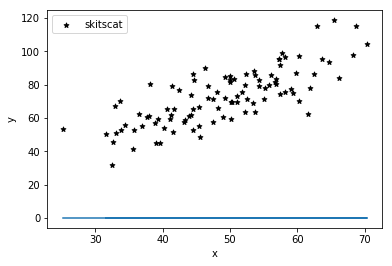

In [9]:
plt.scatter(x, y, label='skitscat', color='k', s=25, marker="*")
plt.plot(x, (initial_m * x + initial_b))

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()

In [10]:
# Adjust values of m and b to reduce above error. Find best fit line for same.
def gradient_descent(x, y, initial_b, initial_m, learning_rate, number_iteration, n):
    b = initial_b
    m = initial_m
    
    for i in range(number_iteration):
        b, m = step_gradient(x, y, b, m, learning_rate, n)
    
    return b, m

In [11]:
def step_gradient(x, y, current_b, current_m, learning_rate, n):
    gradient_b = 0
    gradient_m = 0
    
    for i in range(len(data)):
        gradient_b += (-(2/n) * (y[i] - ((current_m * x[i]) + current_b)))
        gradient_m += (-(2/n) * x[i] * (y[i] - ((current_m * x[i]) + current_b)))
    
    b = current_b - (learning_rate * gradient_b)
    m = current_m - (learning_rate * gradient_m)
    
    return b, m

In [12]:
final_b, final_m = gradient_descent(x, y, initial_b, initial_m, learning_rate, number_iteration, n)

print final_b, final_m

0.0889365199374 1.47774408519


In [13]:
print cost(x, y, final_b, final_m, n)

-5379.72225254


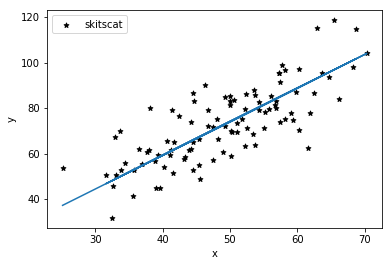

In [14]:
plt.scatter(x, y, label='skitscat', color='k', s=25, marker="*")
plt.plot(x, (final_m * x + final_b))

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()